<a href="https://colab.research.google.com/github/TheCharioteer/FODS/blob/main/FloodProbabilityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flood Probability Prediction

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error

# Loading the Dataset

In [7]:
train = pd.read_csv("/content/test.csv")
test = pd.read_csv("/content/train.csv")

In [8]:
pd.set_option('display.max_columns', None)
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4.0,6.0,3.0,5.0,6.0,7.0,8.0,7.0,8.0,4.0,8.0,5.0,7.0,5.0,6.0,3.0,6.0,4.0,4.0,5.0
1,1117958,4.0,4.0,2.0,9.0,5.0,5.0,4.0,7.0,5.0,4.0,2.0,4.0,7.0,4.0,5.0,1.0,7.0,4.0,4.0,3.0
2,1117959,1.0,3.0,6.0,5.0,7.0,2.0,4.0,6.0,4.0,2.0,7.0,9.0,2.0,5.0,5.0,2.0,3.0,6.0,8.0,3.0
3,1117960,2.0,4.0,4.0,6.0,4.0,5.0,4.0,3.0,4.0,4.0,7.0,8.0,4.0,6.0,7.0,6.0,4.0,2.0,4.0,4.0
4,1117961,6.0,3.0,2.0,4.0,6.0,4.0,5.0,5.0,3.0,7.0,4.0,3.0,2.0,6.0,4.0,6.0,8.0,4.0,5.0,5.0


In [9]:
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3.0,5.0,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0.0,3.0,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7.0,5.0,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7.0,4.0,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6.0,6.0,4.0,1.0,2.0,3.0,5.0,0.415


Information about the data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714433 entries, 0 to 714432
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               714433 non-null  int64  
 1   MonsoonIntensity                 714432 non-null  float64
 2   TopographyDrainage               714432 non-null  float64
 3   RiverManagement                  714432 non-null  float64
 4   Deforestation                    714432 non-null  float64
 5   Urbanization                     714432 non-null  float64
 6   ClimateChange                    714432 non-null  float64
 7   DamsQuality                      714432 non-null  float64
 8   Siltation                        714432 non-null  float64
 9   AgriculturalPractices            714432 non-null  float64
 10  Encroachments                    714432 non-null  float64
 11  IneffectiveDisasterPreparedness  714432 non-null  float64
 12  Dr

In [11]:
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.144330e+05,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000,714432.000000
mean,1.475173e+06,4.915117,4.930354,4.959723,4.947567,4.937577,4.932878,4.957726,4.927808,4.944790,4.950592,4.946769,4.943335,4.957384,4.928648,4.930181,4.926106,4.927244,4.948367,4.940609,4.943797
std,2.062392e+05,2.055759,2.093522,2.071485,2.053471,2.081454,2.059219,2.088680,2.069100,2.073665,2.082455,2.081281,2.071899,2.088914,2.079279,2.083019,2.066256,2.073832,2.066330,2.078989,2.087886
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.296565e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.475173e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.653781e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.832389e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,17.000000,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [29]:
train.isnull().sum()

,0
MonsoonIntensity,1
TopographyDrainage,1
RiverManagement,1
Deforestation,1
Urbanization,1
ClimateChange,1
DamsQuality,1
Siltation,1
AgriculturalPractices,1
Encroachments,1


In [13]:
train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

# EDA

In [14]:
plt.figure(figsize=(5,3))
plt.hist(train.FloodProbability, bins=20, density=True)
plt.title("Distribution of target feature")
plt.xlabel("FloodProbability")
plt.ylabel("Desnity")
plt.show()

# So from here we conclude that the it is following a noraml distribution with mean at 0.5

AttributeError: 'DataFrame' object has no attribute 'FloodProbability'

<Figure size 500x300 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
# Assuming the correct column name is 'floodprobability'
plt.hist(train['floodprobability'], bins=20, density=True)
plt.title("Distribution of target feature")
plt.xlabel("FloodProbability")
plt.ylabel("Desnity")
plt.show()

# So from here we conclude that the it is following a noraml distribution with mean at 0.5

KeyError: 'floodprobability'

<Figure size 500x300 with 0 Axes>

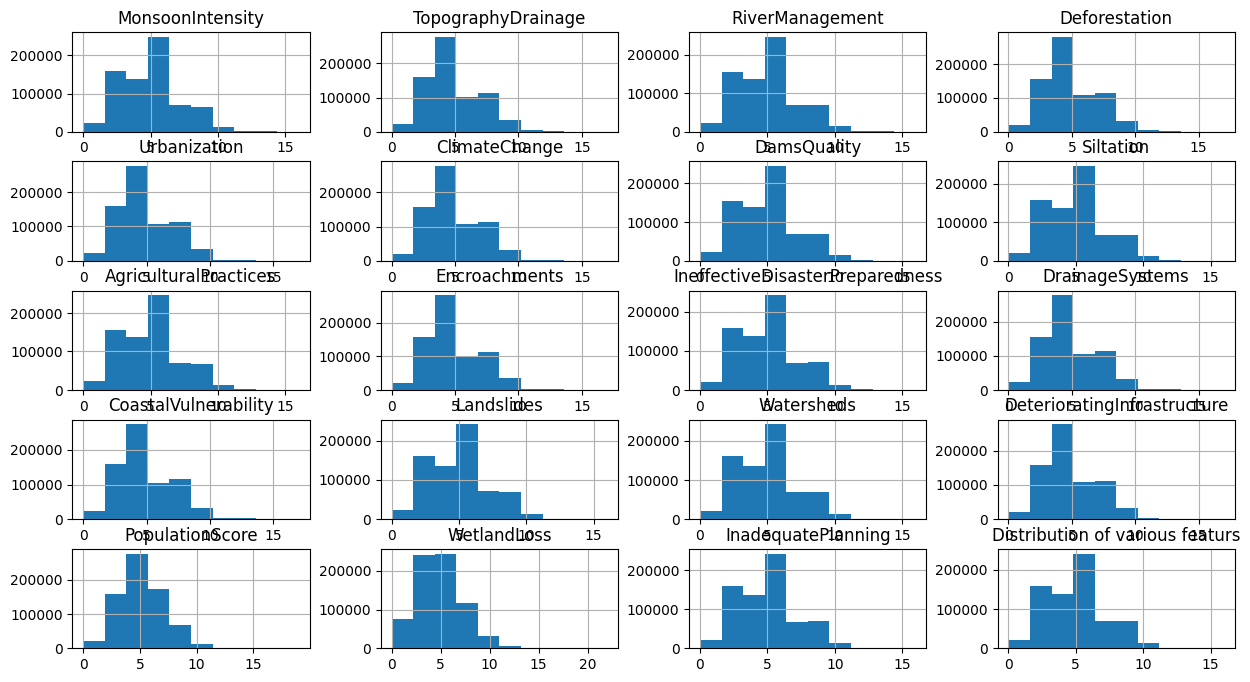

In [15]:
train.hist(figsize=(15,8))
plt.title("Distribution of various featurs")
plt.show()

# All the distributions are right Skewed distributions

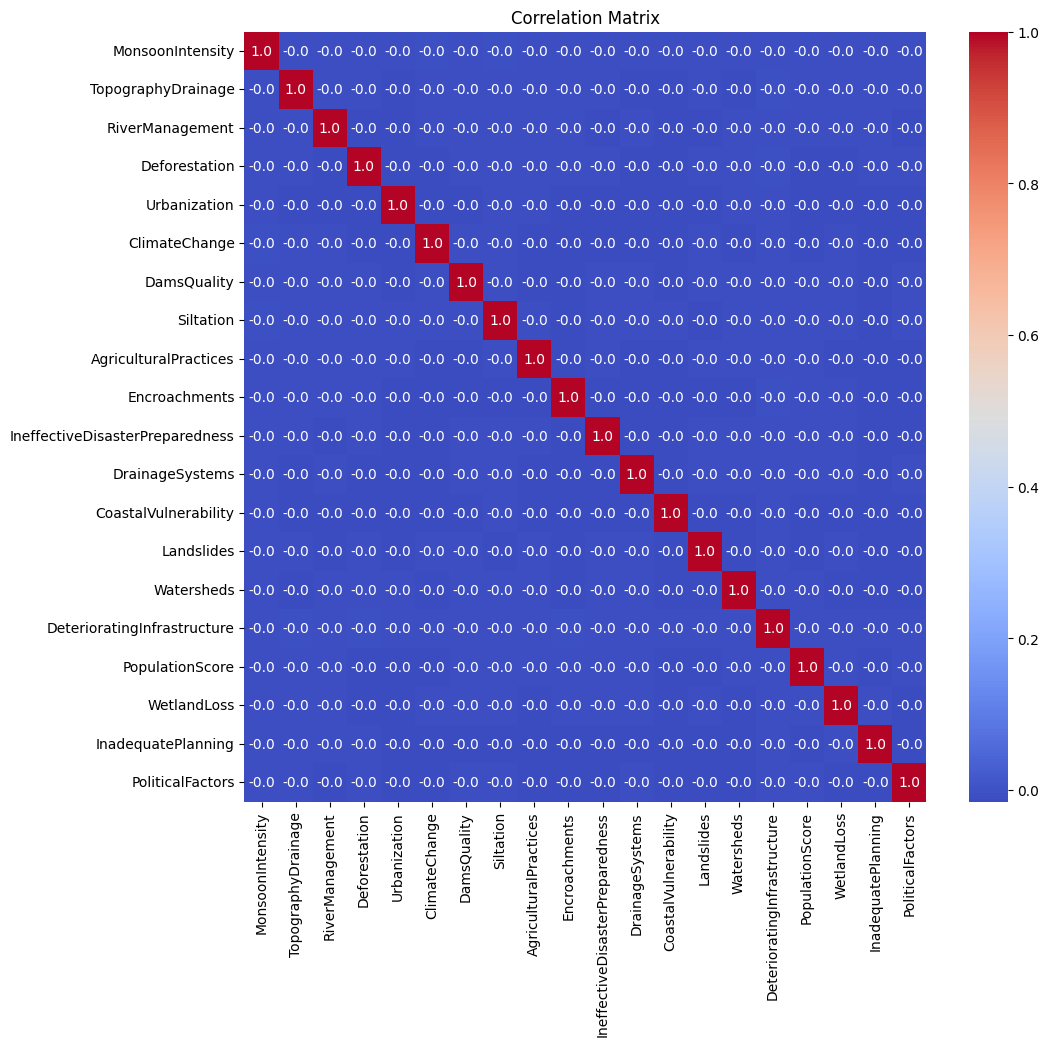

In [16]:
plt.figure(figsize=(11,10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# From the correlation matrix we observe that there are no corelation among the features
# but are only correlated with the target variable

# Splitting The Dataset

In [18]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)


# Model Training

In [19]:
models = {
    "linear Reg" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "SVM" : SVR(),
    "Decision Tree" : DecisionTreeRegressor(),
}

In [20]:
def train_regressor(reg,X_train,y_train,X_test,y_test):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    roc = r2_score(y_test, y_pred)
    return roc

In [21]:
r2_scores = []
for name,reg in models.items():
    current_r2 = train_regressor(reg, X_train, y_train, X_test, y_test)
    print("Name: ", name)
    print("R2 Score: ", current_r2)
    r2_scores.append(current_r2)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
performance_df = pd.DataFrame({'Algorithm': models.keys(), 'R2_score':r2_scores})
performance_df

ValueError: All arrays must be of the same length

In [23]:
sns.barplot(x=performance_df['Algorithm'], y=performance_df['R2_score'])
plt.title("Performance of differnet Models")
plt.show()

NameError: name 'performance_df' is not defined

In [24]:
model = Ridge()

In [26]:
params = {
    'alpha' : [0.1,1],
    'fit_intercept' : [True, False],
    'solver' : ['auto','sag','saga'],
}

In [27]:
grid = GridSearchCV(model,params,scoring='neg_mean_absolute_error',n_jobs=-1,cv=5)
grid.fit(X_train,y_train)

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
grid.best_params_

In [ ]:
Predictions = grid.predict(test)
Predictions.shape

In [ ]:
test.shape

In [ ]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")

In [ ]:
submission['FloodProbability'] = Predictions

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)